# Visualization from nc file

In [1]:
import xarray as xr
import matplotlib.pyplot as plt


## Read file

In [2]:
data = xr.open_dataset("../../woneydb/forecast_20250624.nc")

In [3]:
data

<xarray.Dataset> Size: 7GB
Dimensions:    (time: 10, depth: 21, latitude: 672, longitude: 1440)
Coordinates:
  * depth      (depth) float32 84B 0.494 47.37 92.33 ... 4.833e+03 5.275e+03
  * latitude   (latitude) float64 5kB -78.0 -77.75 -77.5 ... 89.25 89.5 89.75
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * time       (time) datetime64[ns] 80B 2025-06-25 2025-06-26 ... 2025-07-04
Data variables:
    thetao     (time, depth, latitude, longitude) float64 2GB ...
    zos        (time, latitude, longitude) float64 77MB ...
    uo         (time, depth, latitude, longitude) float64 2GB ...
    vo         (time, depth, latitude, longitude) float64 2GB ...
    so         (time, depth, latitude, longitude) float64 2GB ...
Attributes:
    Conventions:  CF-1.8
    area:         Global
    contact:      glonet@mercator-ocean.eu
    institution:  Mercator Ocean International
    source:       MOI GLONET
    title:        daily mean fields from GLONET 1/4 degree resolution Forecas...
    references:   www.edito.eu

## Variables

In [4]:
state = 'zos'
# state = 'thetao'
# state = 'so'
# state = 'uo'
# state = 'vo'

# If the state is 'thetao' or 'so' or 'uo or 'vo', Choose depth between 0 ~ 20.
depth_index = 0

# What forecast cycle that you are interested in ? For 7 days cycle, the time index is 6. 
time_index = 0

In [5]:
match state :
    case "zos" :
        cmap_param = "seismic"
    case "thetao" :
        cmap_param = "viridis"
    case "so" :
        cmap_param = "jet"
    case "uo" :
        cmap_param = "coolwarm"
    case "vo" :
        cmap_param = "coolwarm"

## Global view

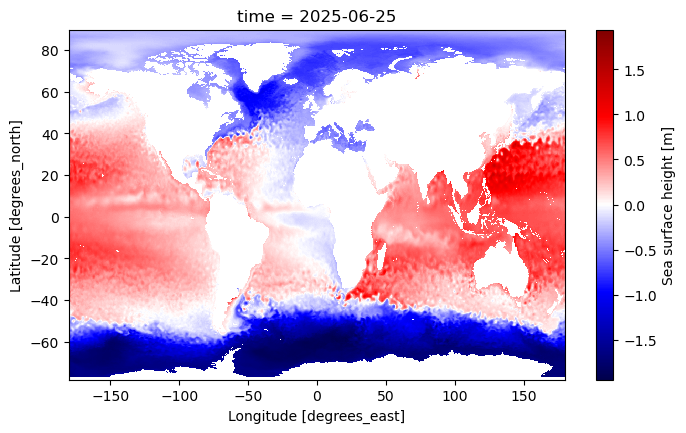

In [ ]:
plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
# (missing_dims = 'ignore') parameter allow us to simplify the code by igonoring depth coordinate at 'zos' variable.
forecast_window = data[state].isel(depth=depth_index, time=time_index, missing_dims='ignore') 
forecast_window.plot(cmap=cmap_param)

xmin = forecast_window


## Zoom in 

In [ ]:
from xarray import Dataset

def defineZone(inputnc) -> Dataset :
    lat_min1, lat_max1, lat_min2, lat_max2, lat_min3, lat_max3 = -40, -20, 30 , 50, 20, 40
    lon_min1, lon_max1, lon_min2, lon_max2, lon_min3, lon_max3 = 0, 70, -80, -10, 100, 170
    arr = []
    arr.append(inputnc.sel(latitude=slice(lat_min1, lat_max1), longitude=slice(lon_min1, lon_max1))) # Agulhas
    arr.append(inputnc.sel(latitude=slice(lat_min2, lat_max2), longitude=slice(lon_min2, lon_max2))) # Gulf Stream
    arr.append(inputnc.sel(latitude=slice(lat_min3, lat_max3), longitude=slice(lon_min3, lon_max3))) # Kuroshio

    
    return arr